Loading required package: lattice
Loading required package: ggplot2
Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var

Loading required package: survival

Attaching package: ‘survival’

The following object is masked from ‘package:caret’:

    cluster

Loading required package: splines
Loading required package: parallel
Loaded gbm 2.1.1


+ Fold1: shrinkage=0.2, interaction.depth=1, n.minobsinnode=10, n.trees=150 
- Fold1: shrinkage=0.2, interaction.depth=1, n.minobsinnode=10, n.trees=150 
+ Fold1: shrinkage=0.2, interaction.depth=2, n.minobsinnode=10, n.trees=150 
- Fold1: shrinkage=0.2, interaction.depth=2, n.minobsinnode=10, n.trees=150 
+ Fold1: shrinkage=0.2, interaction.depth=3, n.minobsinnode=10, n.trees=150 
- Fold1: shrinkage=0.2, interaction.depth=3, n.minobsinnode=10, n.trees=150 
+ Fold2: shrinkage=0.2, interaction.depth=1, n.minobsinnode=10, n.trees=150 
- Fold2: shrinkage=0.2, interaction.depth=1, n.minobsinnode=10, n.trees=150 
+ Fold2: shrinkage=0.2, interaction.depth=2, n.minobsinnode=10, n.trees=150 
- Fold2: shrinkage=0.2, interaction.depth=2, n.minobsinnode=10, n.trees=150 
+ Fold2: shrinkage=0.2, interaction.depth=3, n.minobsinnode=10, n.trees=150 
- Fold2: shrinkage=0.2, interaction.depth=3, n.minobsinnode=10, n.trees=150 
+ Fold3: shrinkage=0.2, interaction.depth=1, n.minobsinnode=10, n.trees=150 

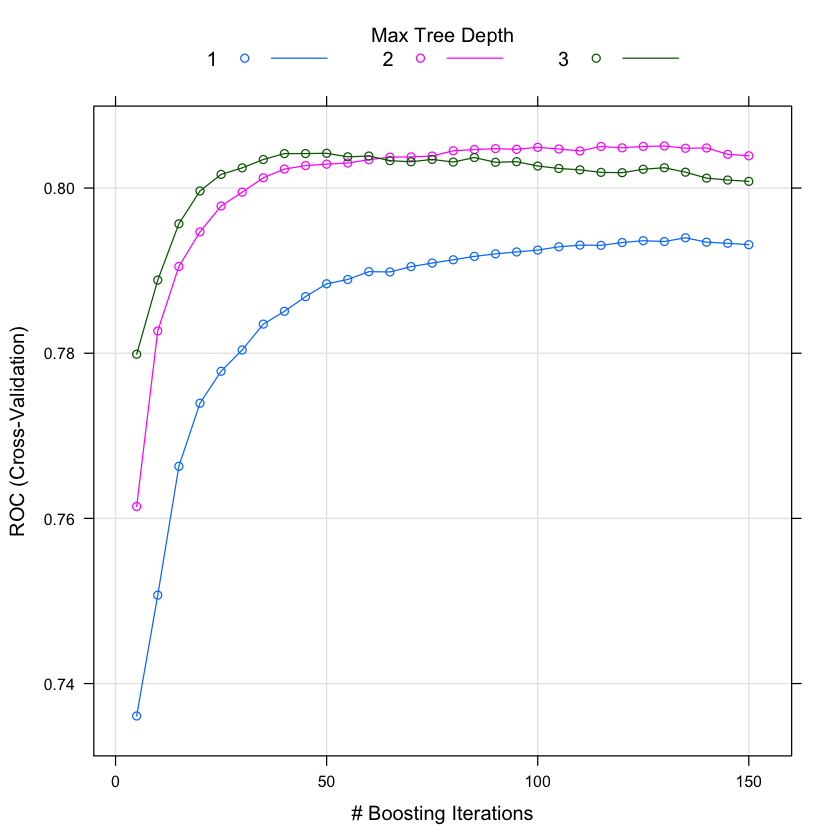

,SplitVar,SplitCodePred,LeftNode,RightNode,MissingNode,ErrorReduction,Weight,Prediction
0,3,-0.165,1,5,6,801.0064,5000,0.004853393
1,1,-0.24,2,3,4,143.8266,1558,-0.1071663
2,-1,0.002197802,-1,-1,-1,0,304,0.002197802
3,-1,-0.1336788,-1,-1,-1,0,1254,-0.1336788
4,-1,-0.1071663,-1,-1,-1,0,1558,-0.1071663
5,-1,0.0555584,-1,-1,-1,0,3442,0.0555584
6,-1,0.004853393,-1,-1,-1,0,5000,0.004853393


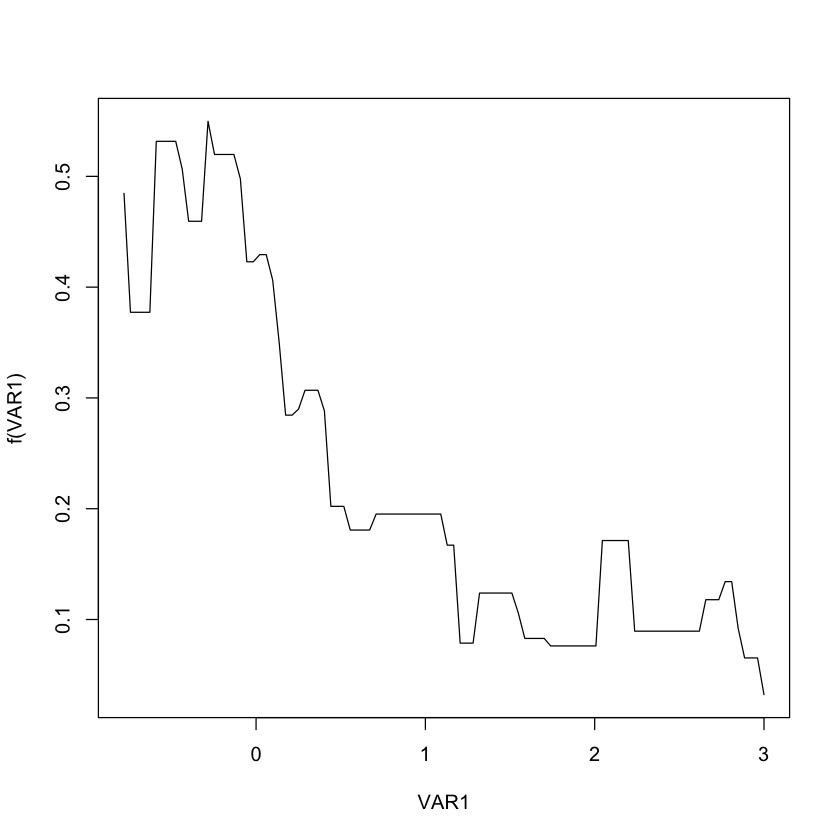

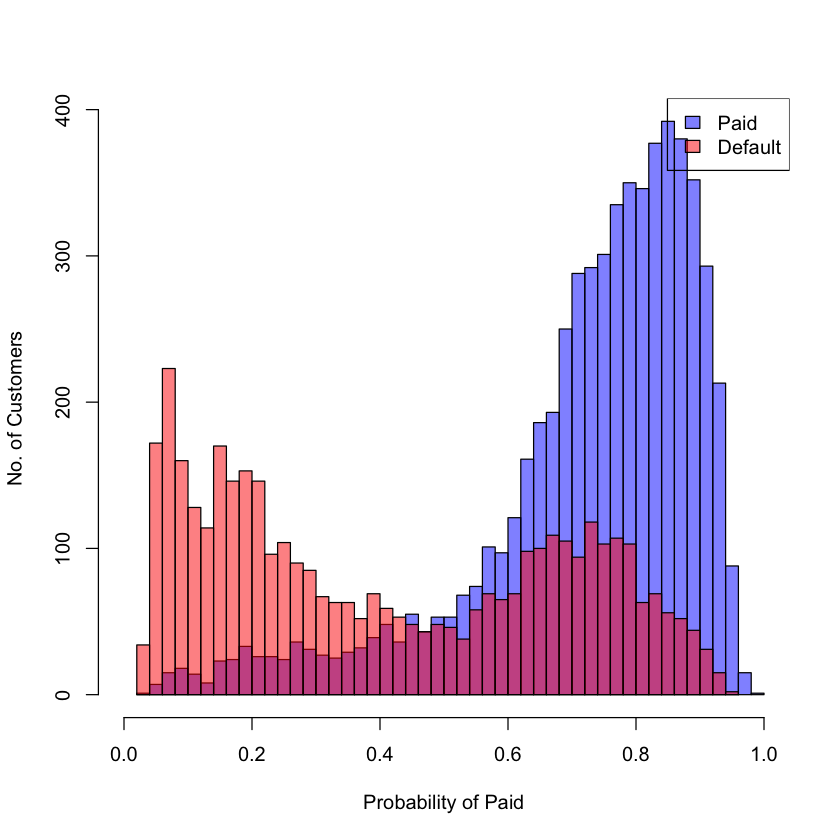

In [1]:
#install.packages(c("caret"))
#install.packages(c("pROC"))
#install.packages(c("gbm"))
#install.packages(c("plyr"))

library(caret)
library(pROC)
library(gbm)
library(plyr)



#######
#######
#######

e <- read.csv("data_science_data.csv")

DFT<- as.factor(e[,1])
e[,1]<- NULL
levels(DFT) <- list(good = "0", dft = "1")
e<-data.frame(e,DFT)

#######
#######
#######


grid <- expand.grid(interaction.depth = c(1,2,3),
                    n.trees = seq(5, 150, by=5),
                    shrinkage = c(.2),
                    n.minobsinnode = 10)



cvCtrl <- trainControl(method = "cv",
                       number =5,
                       summaryFunction = twoClassSummary,
                       classProbs = TRUE,
                       verboseIter= TRUE)



gbm_test <- train(DFT ~ .,
                  data = e,
                  method = "gbm",
                  metric = "ROC",
                  trControl = cvCtrl,
                  tuneGrid = grid,
                  distribution = "adaboost",
                  bag.fraction = .5,
                  verbose = FALSE,
                  na.action = na.pass)



#######
#######
#######

plot(gbm_test)

plot(gbm_test$finalModel, i.var = 1)


#######
#######
#######

pretty.gbm.tree(gbm_test$finalModel, i.tree = 1)


#######
#######
#######

results <- predict(gbm_test,
                   newdata = e,
                   type = "prob",
                   na.action = na.omit)




b=50
g<- results[ e$DFT =="good", ]$good
d<- results[ e$DFT =="dft" , ]$good

hg <- hist(g, breaks =b, plot = F)
dg <- hist(d, breaks =b, plot = F)

top <- max(hg$counts, dg$counts)

hist( g,
     col=rgb(0,0,1,0.5),
     breaks=b,
     xlim = c(0, 1), ylim=c(0,top),
     xlab ="Probability of Paid", main = "",  ylab = "No. of Customers")

legend("topright", c("Paid","Default"), fill=c( rgb(0,0,1,0.5), rgb(1,0,0,0.5))  )

hist( d,
     col=rgb(1,0,0,0.5),
     breaks=b,
     add=T)


In [ ]:
2